In [132]:
import numpy as np
import pandas as pd

In [133]:
%matplotlib inline
import pickle
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
X,y_hr,y_participant,y_activity,y_time = pickle.load(open('../data/wisdm_individual_windows_10.p','rb'))
X = X/9.8

In [134]:
X[X>2] = 2
X[X<-2] = -2

In [135]:
X_magnitude = np.array([np.sqrt(np.sum(np.square(a),axis=1)) for a in X])

In [136]:
from scipy.stats import iqr,skew,kurtosis
def get_features(a):
    features = []
    features.append([np.mean(a),np.median(a),np.std(a),np.percentile(a,80),
                    np.percentile(a,20),iqr(a),skew(a),kurtosis(a),np.var(a)])
    return np.array(features).reshape(-1)

In [137]:
X_features = np.array([get_features(a) for a in X_magnitude])

In [138]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
X_features.shape

(37688, 9)

In [191]:
X_features_pca = PCA(n_components=1).fit_transform(X_features)

In [192]:
X_features_var = X_features[:,-1]

In [148]:
X_features_tsne = TSNE(n_components=1).fit_transform(X_features)

No handles with labels found to put in legend.


Sitting 0


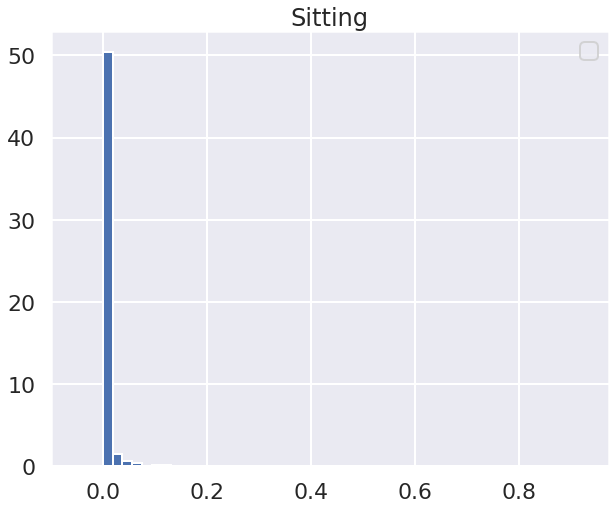

No handles with labels found to put in legend.


Stairs 1


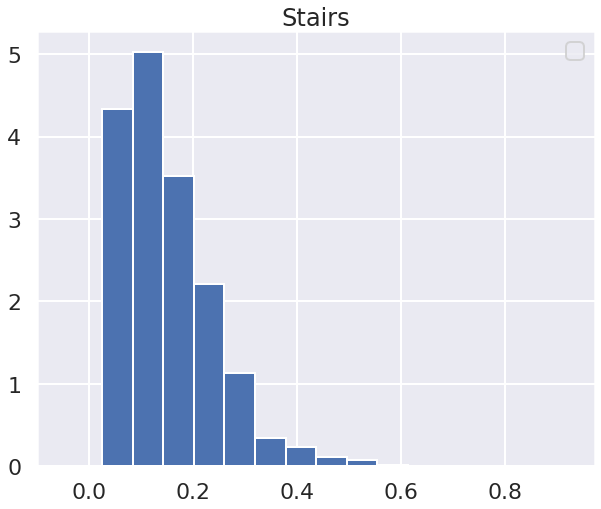

No handles with labels found to put in legend.


Jogging 2


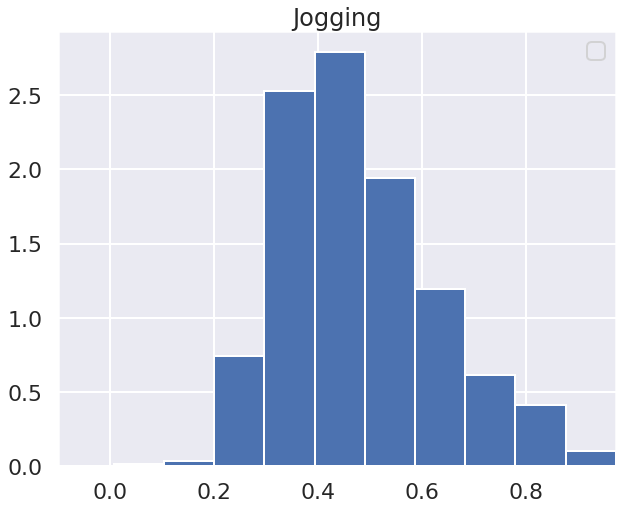

No handles with labels found to put in legend.


Typing 3


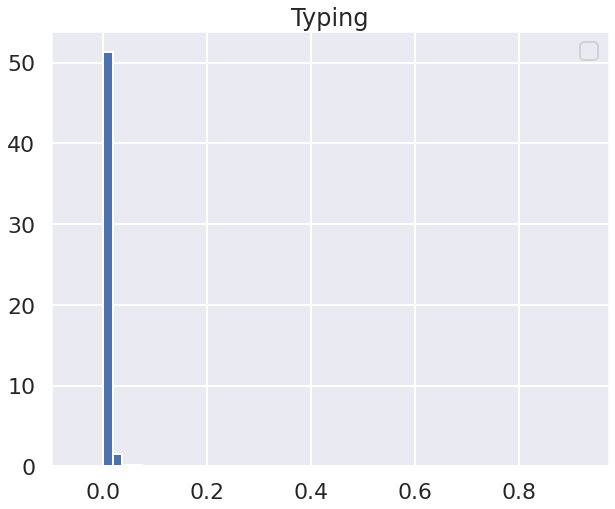

No handles with labels found to put in legend.


Standing 4


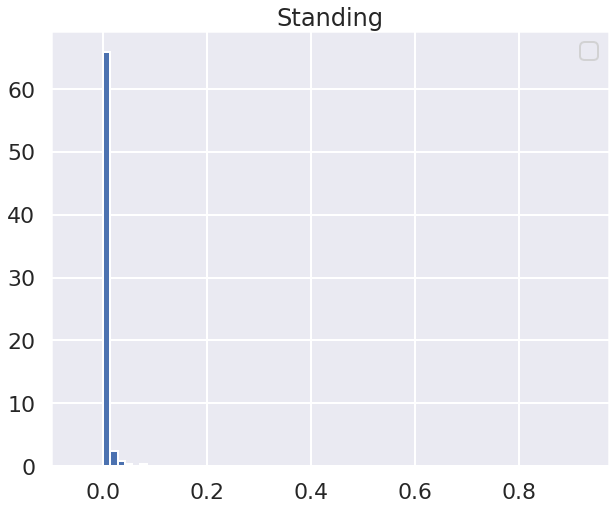

No handles with labels found to put in legend.


Walking 5


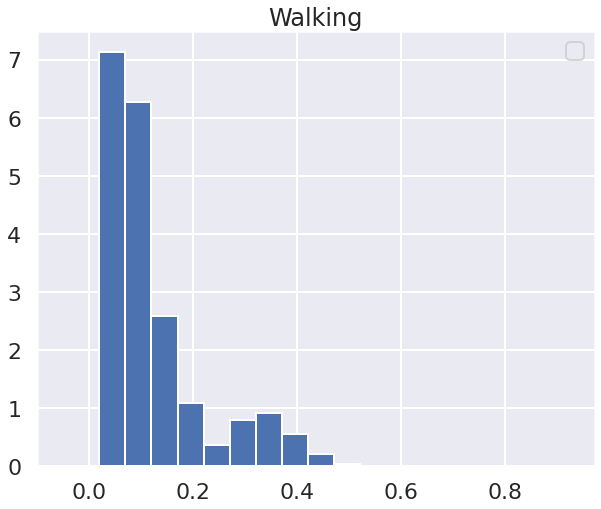

Brushing 6


No handles with labels found to put in legend.


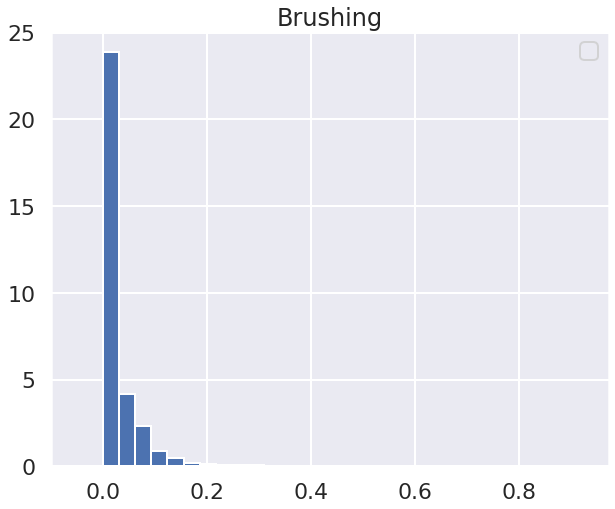

No handles with labels found to put in legend.


Eating 7


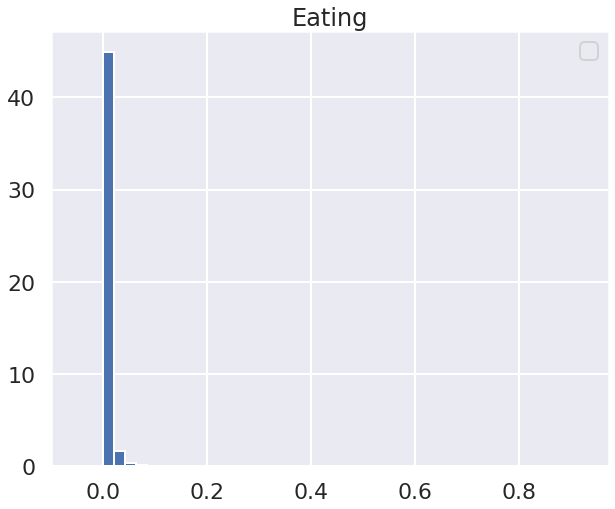

No handles with labels found to put in legend.


Drinking 8


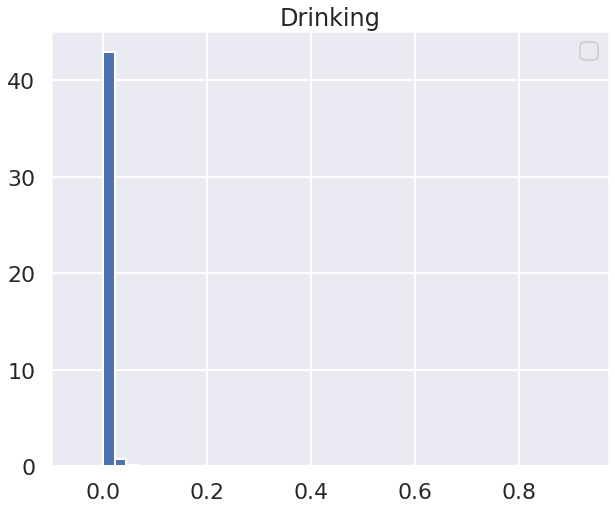

No handles with labels found to put in legend.


Kicking 9


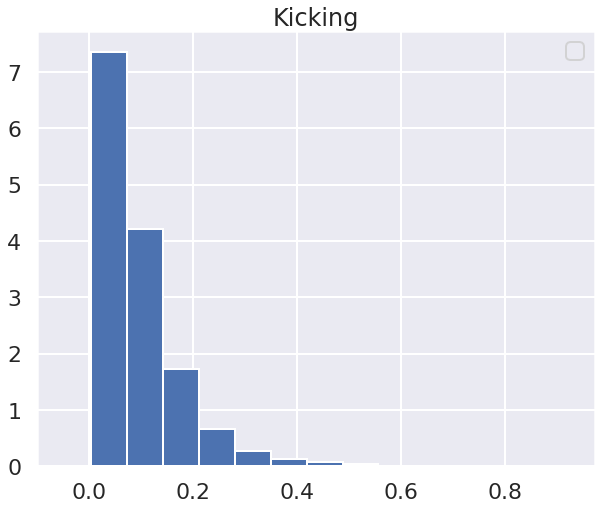

No handles with labels found to put in legend.


Playing Catch 10


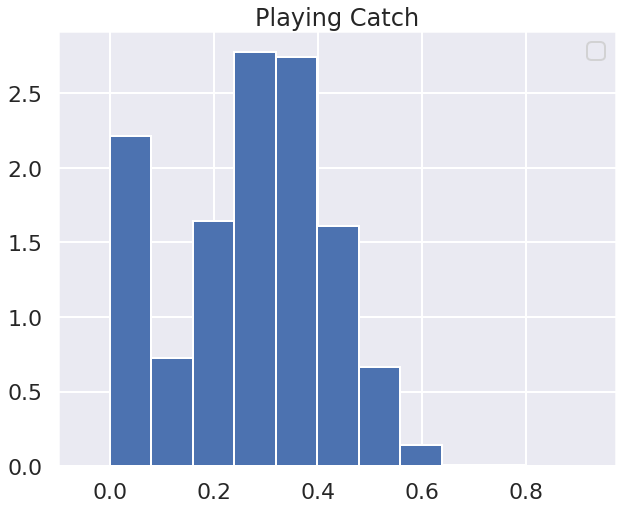

No handles with labels found to put in legend.


Dribbling 11


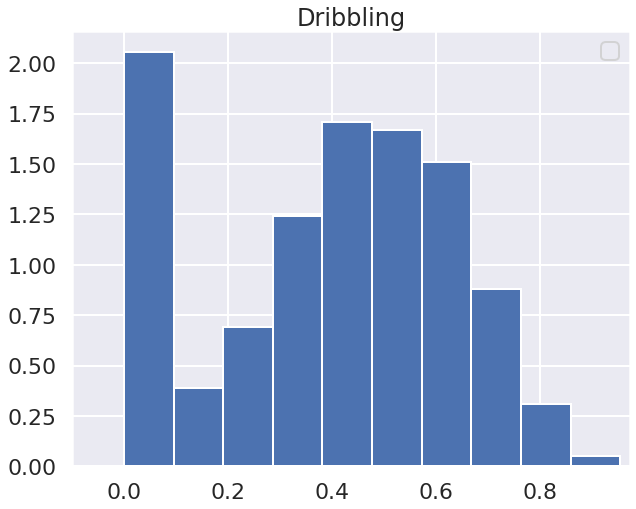

No handles with labels found to put in legend.


Writing 12


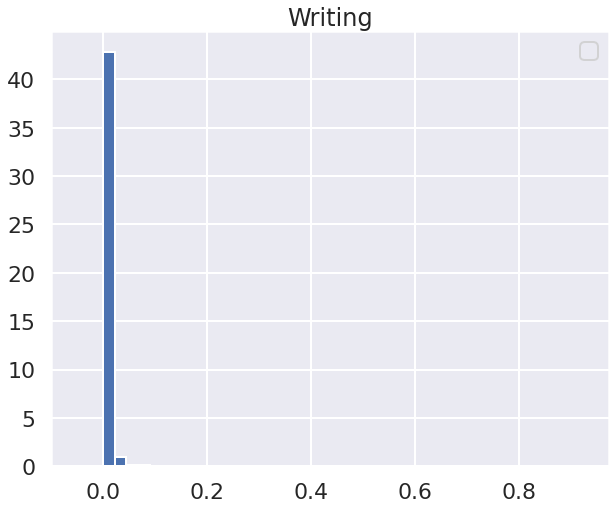

No handles with labels found to put in legend.


Clapping 13


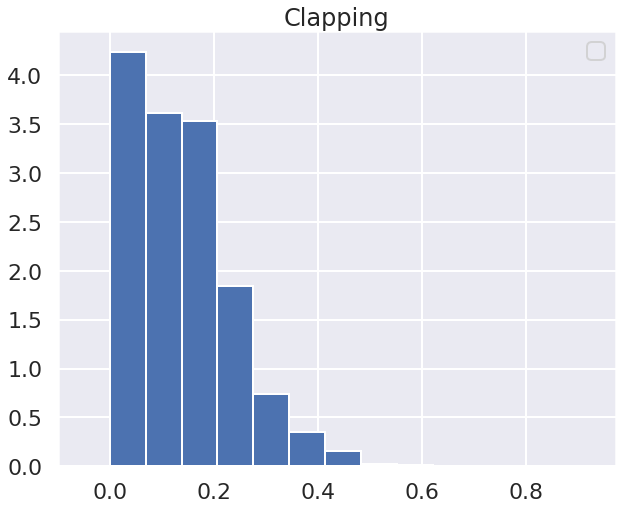

No handles with labels found to put in legend.


Folding Clothes 14


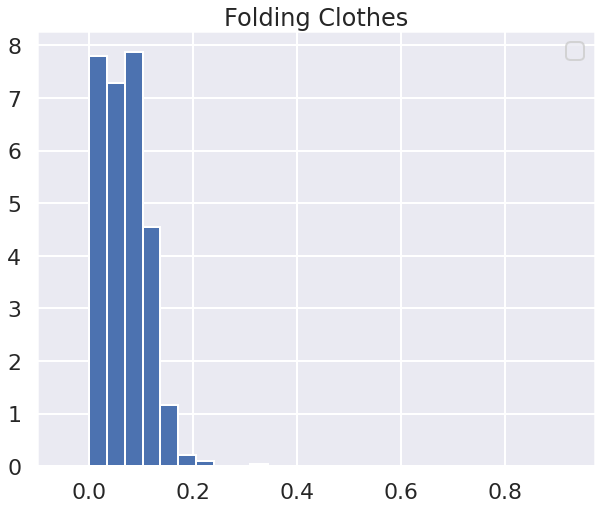

In [195]:
y_activity_labels = np.array([activity_list[i] for i in y_activity])
activity_list = ['Sitting','Stairs','Jogging','Typing','Standing','Walking','Brushing','Eating','Drinking','Kicking',
                'Playing Catch','Dribbling','Writing','Clapping','Folding Clothes']
import seaborn
# seaborn.set_palette("Reds")
sns.set_style('whitegrid')
sns.set(font_scale=2)
sns.set_context("poster")
for i in range(15):
    print(activity_list[i],i)
    plt.figure(figsize=(10,8))
    ax = plt.gca()
    plt.hist(X_features_var[y_activity==i],density=True)
    ax.legend()
    ax.set_ylabel('')
    plt.xlim([np.min(X_features_var)-.1,np.max(X_features_var)])
    plt.title(activity_list[i])
    plt.savefig('./images/var/'+str(activity_list[i])+'.png')
    plt.show()


(0.0, 10.0)

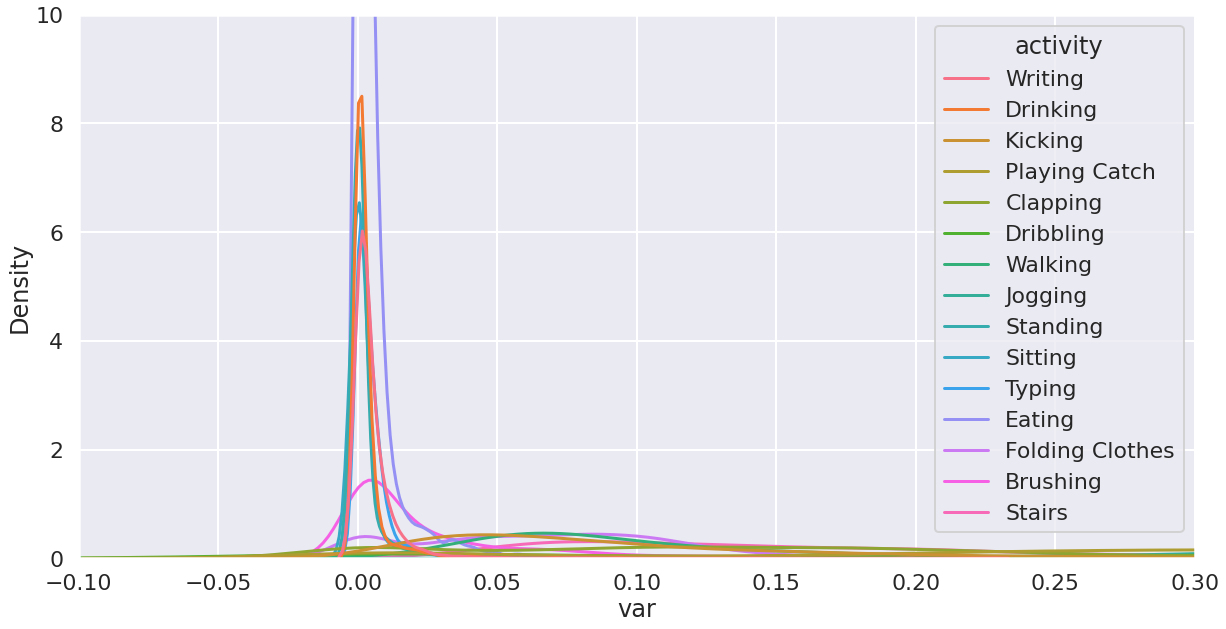

In [223]:
plt.figure(figsize=(20,10))
ax = plt.gca()
g = sns.kdeplot(x='var',hue='activity',data=df,ax=ax)
plt.xlim([-.1,.3])
plt.ylim(0,10)
# plt.save_fig('tsne.')
# plt.legend(ncol=4)
# ax.legend(ncol=4)

In [141]:
activity_list = ['Sitting','Stairs','Jogging','Typing','Standing','Walking','Brushing','Eating','Drinking','Kicking',
                'Playing Catch','Dribbling','Writing','Clapping','Folding Clothes']

In [196]:
df = pd.DataFrame({'mean':X_features[:,0],'median':X_features[:,1],
                   'std':X_features[:,2],'80percentile':X_features[:,3],
                   '20percentile':X_features[:,4],'iqr':X_features[:,5],
                   'skew':X_features[:,6],'kurtosis':X_features[:,7],
                   'var':X_features[:,8],
                   'pca1':X_features_pca[:,0],'pca2':X_features_pca[:,0],'tsne1':X_features_tsne[:,0],'tsne2':X_features_tsne[:,0],
                   'activity':y_activity_labels})

In [144]:
feature_names = ['mean','median','std','80percentile','20percentile','iqr','skew','kurtosis','var','pca1','pca2','tsne1','tsne2']

In [145]:
import seaborn
# seaborn.set_palette("Reds")
sns.set_style('whitegrid')
sns.set(font_scale=2)
sns.set_context("poster")

In [146]:
# fig,ax = plt.subplots(1,1,figsize=(20,20))
# ax = plt.gca()
# sns.set(rc={'figure.figsize':(20,20)})

# for i in range()

# plt.rcParams.update({'font.size':50})

for i in range(len(feature_names)):
    for j in range(i+1,len(feature_names)):
        x = feature_names[i]
        y = feature_names[j]
        g = sns.jointplot(x=x,y=y,hue='activity',data=df)
        g.fig.set_figwidth(20)
        g.fig.set_figheight(20)
        g.ax_joint.legend(ncol=4)
        plt.savefig('./images/scatter/'+x+'-'+y+'.png')
        plt.close('all')

In [116]:
import shutil

In [186]:
shutil.make_archive('./images/pca/','zip','./images/pca/')

'/home/azim/ppg_heart_rate/activity_classification/images/pca.zip'

In [200]:
shutil.make_archive('./images/tsne/','zip','./images/tsne/')

'/home/azim/ppg_heart_rate/activity_classification/images/tsne.zip'

In [201]:
shutil.make_archive('./images/var/','zip','./images/var/')

'/home/azim/ppg_heart_rate/activity_classification/images/var.zip'

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix

In [122]:
skf = StratifiedKFold(n_splits=5)

In [127]:
y_pred = cross_val_predict(LogisticRegression(C=1000),X_features,y_activity,cv=skf.split(X_features,y_activity))

/home/azim/miniconda3/envs/test1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/azim/miniconda3/envs/test1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [128]:
print(classification_report(y_activity,y_pred))

              precision    recall  f1-score   support

           0       0.21      0.01      0.03      2126
           1       0.34      0.34      0.34      2066
           2       0.60      0.73      0.66      2046
           3       0.00      0.00      0.00      2050
           4       0.00      0.00      0.00      2162
           5       0.39      0.58      0.47      2103
           6       0.46      0.19      0.27      2085
           7       0.38      0.93      0.54      8253
           8       0.12      0.00      0.01      2156
           9       0.33      0.23      0.27      2098
          10       0.41      0.28      0.33      2092
          11       0.45      0.44      0.45      2114
          12       0.26      0.03      0.05      2151
          13       0.50      0.62      0.55      2083
          14       0.50      0.24      0.33      2103

    accuracy                           0.41     37688
   macro avg       0.33      0.31      0.29     37688
weighted avg       0.34   

/home/azim/miniconda3/envs/test1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
